<a href="https://colab.research.google.com/github/janhavidusad21/Data-science-Assigment/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
wine=pd.read_csv("/content/wine.csv")

In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


There is no null values in dataset all fileds are numeric

In [6]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

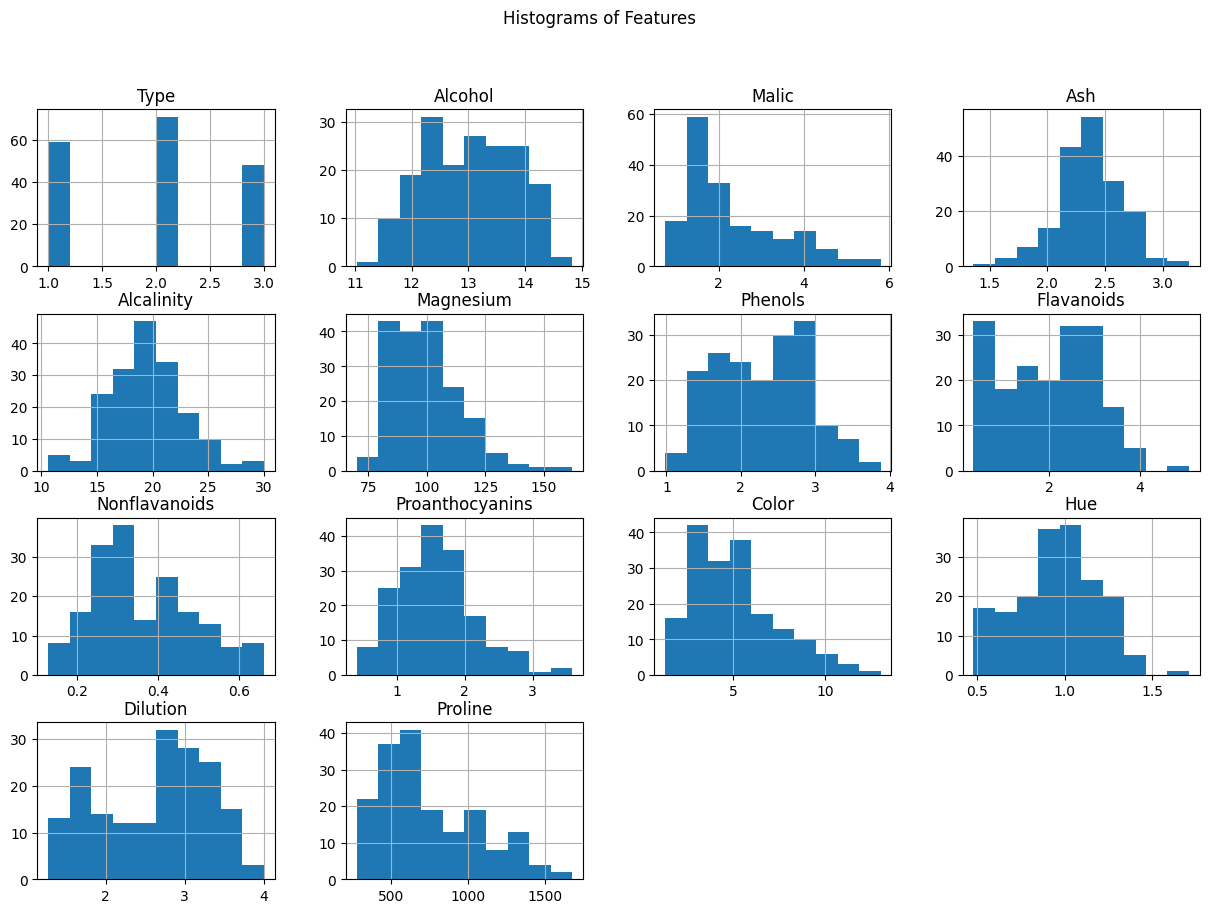

In [8]:
wine.hist(figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

IN MALIC, MAGNESIUM, COLOR, HUE AND PROLINE FIELDS THERE MIGHT BE OULIERS

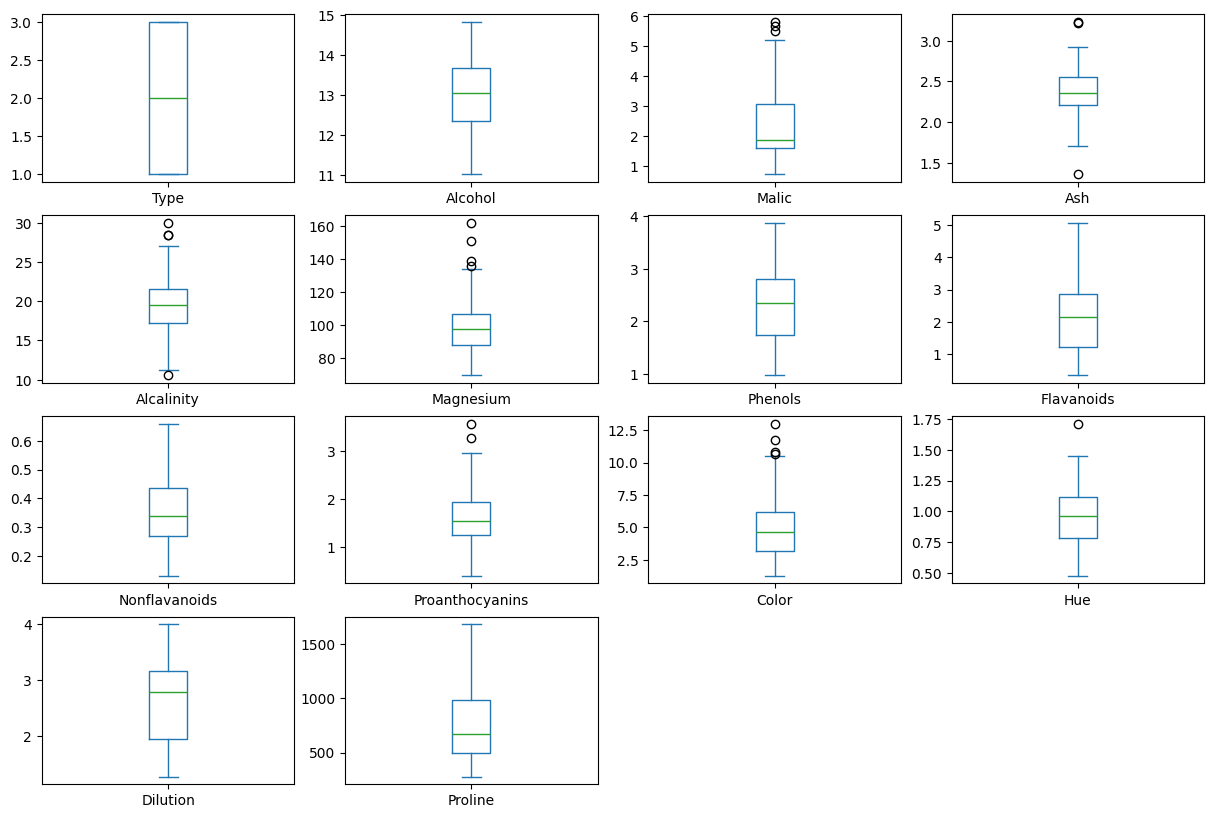

In [29]:
wine.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

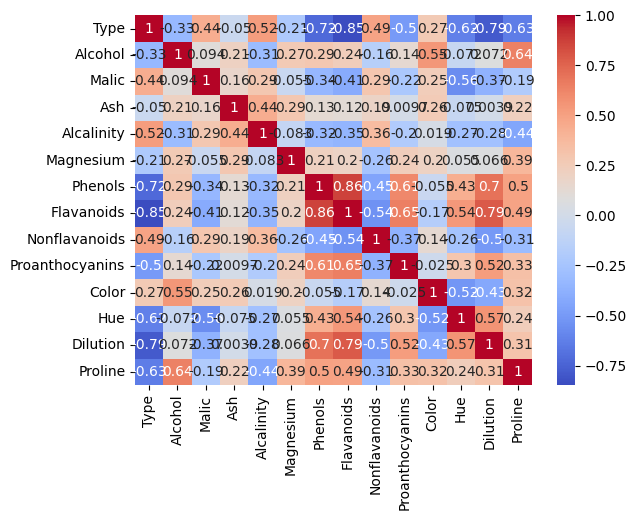

In [30]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()

In [15]:
scaled_data=sc.fit_transform(wine)
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [16]:
df=pd.DataFrame(sc.fit_transform(wine),columns=wine.columns)
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [17]:
from sklearn.decomposition  import PCA

PCA ON ORIGINAL DATA

In [18]:
pca=PCA()
Pca_components=pca.fit_transform(wine)

In [19]:
Pca_components

array([[ 3.18564055e+02,  2.14907729e+01, -3.16461306e+00, ...,
         1.68878924e-01, -1.64297340e-02,  8.93553535e-02],
       [ 3.03098514e+02, -5.36608268e+00, -6.81699246e+00, ...,
         8.89334239e-02, -4.48448723e-02,  1.78962892e-02],
       [ 4.38062063e+02, -6.53798613e+00,  1.06671672e+00, ...,
         1.80875713e-01, -5.03578282e-02, -3.94205943e-02],
       ...,
       [ 8.84563102e+01,  1.87796442e+01,  2.42312742e+00, ...,
        -2.09746486e-01,  8.53365516e-02,  3.43716469e-02],
       [ 9.34544723e+01,  1.86741801e+01,  1.95877509e+00, ...,
        -3.22197601e-04, -4.65644908e-02,  1.36469328e-01],
       [-1.86944619e+02, -2.11062888e-01,  5.73392038e+00, ...,
         3.92954136e-02,  1.60191386e-02,  1.97873108e-02]])

In [20]:
pca.explained_variance_

array([9.92020307e+04, 1.72536596e+02, 9.53119601e+00, 5.10080996e+00,
       1.28578826e+00, 8.68166571e-01, 2.87006972e-01, 1.55278963e-01,
       1.13733317e-01, 8.63784262e-02, 4.62026188e-02, 3.49273038e-02,
       2.07626732e-02, 8.09265892e-03])

In [21]:
var=pca.explained_variance_ratio_
var

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05,
       1.29365230e-05, 8.73476385e-06, 2.88762342e-06, 1.56228669e-06,
       1.14428924e-06, 8.69067273e-07, 4.64851997e-07, 3.51409235e-07,
       2.08896603e-07, 8.14215462e-08])

In [22]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  ])

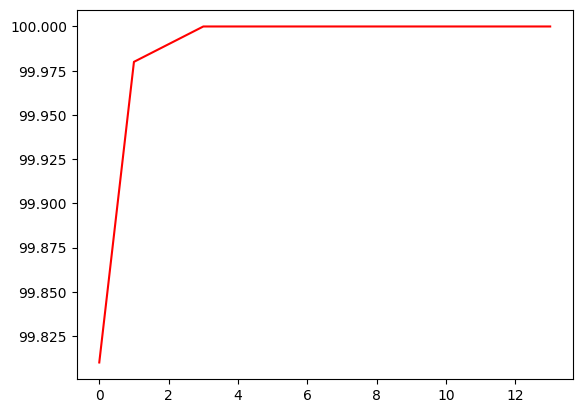

In [23]:
plt.plot(var1,color="red")

PCA ON STANDARDIZE DATA

In [24]:
data=PCA()
Pca_components=data.fit_transform(df)
Pca_components

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [39]:
df_pca=pd.DataFrame(Pca_components)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,2.206617,-0.343668,0.751705,-1.004109,1.143155,0.843455,0.206626,-0.125419,0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,1.752263,0.207480,0.399381,0.154223,0.062465,0.139947,0.565588,0.055341,0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,2.756040,-0.940803,0.607758,1.128136,-0.005290,0.733026,-0.052545,-0.027881,0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,2.293784,-0.550474,-0.391570,1.067083,-1.012562,0.755423,-0.426512,0.048784,-0.479793,0.313786,0.344120,-0.109515,0.102823


In [25]:
data.explained_variance_

array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.35201176, 0.29620602, 0.26378805,
       0.2271244 , 0.16975037, 0.13029618, 0.05813894])

In [26]:
wine1=data.explained_variance_ratio_
wine1

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [27]:
var2=np.cumsum(np.round(wine1,decimals=4)*100)
var2

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

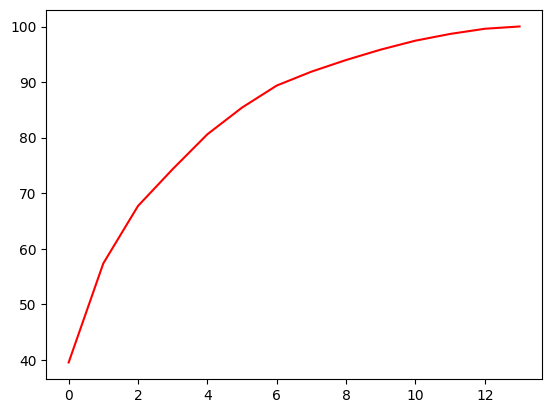

In [28]:
plt.plot(var2,color="red")

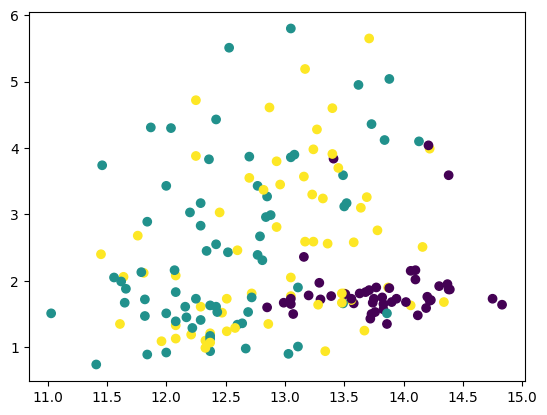

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine)
labels = kmeans.labels_

# Visualization
plt.scatter(wine['Alcohol'], wine['Malic'], c=labels)
plt.show()



In [33]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(wine, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5711220218931753


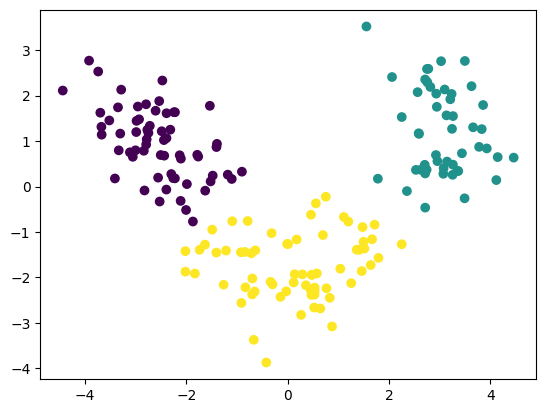

In [40]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df_pca)
labels_pca = kmeans_pca.labels_

# Visualization
plt.scatter(df_pca[0], df_pca[1], c=labels_pca)
plt.show()



In [41]:
silhouette_avg_pca = silhouette_score(df_pca, labels_pca)
print(f'Silhouette Score after PCA: {silhouette_avg_pca}')


Silhouette Score after PCA: 0.30648398324833453


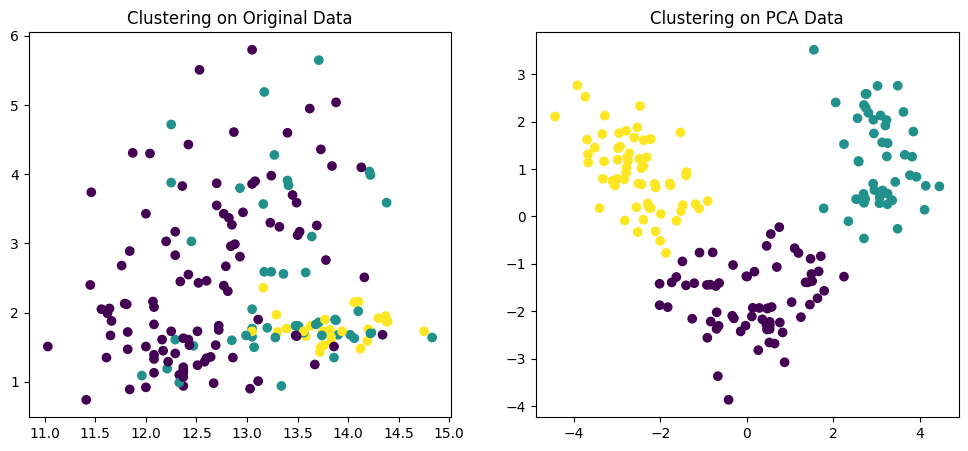

(np.float64(0.5595717835631026), np.float64(0.30648398324833453))

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Applying KMeans to the original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(wine)

# Applying KMeans to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(df_pca)

# Calculating silhouette scores
silhouette_original = silhouette_score(wine, labels_original)
silhouette_pca = silhouette_score(df_pca, labels_pca)

# Visualizing the clustering results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(wine['Alcohol'], wine['Malic'], c=labels_original, cmap='viridis')
plt.title('Clustering on Original Data')

plt.subplot(1, 2, 2)
plt.scatter(df_pca[0], df_pca[1], c=labels_pca, cmap='viridis')
plt.title('Clustering on PCA Data')

plt.show()

silhouette_original, silhouette_pca



Original Data: The silhouette score is approximately 0.571.
PCA Data: The silhouette score is approximately 0.308.
The silhouette score for the original data is higher than that for the PCA-transformed data, indicating that the clustering on the original data produced more well-defined clusters.

Visualization Comparison:

The scatter plots show the clustering results for both the original and PCA-transformed data. The clusters in the original data are more distinct compared to those in the PCA-transformed data.
Analysis:

Dimensionality Reduction Impact: PCA reduced the dimensionality, which can simplify the dataset and reduce computational complexity. However, in this case, it also led to a decrease in the quality of clustering as indicated by the lower silhouette score.
Cluster Separation: The original data had more clearly separated clusters, likely due to retaining the original feature relationships that PCA may have diluted

# **conclusion and insights**

Clustering on the original dataset produced better-defined clusters as indicated by a higher silhouette score.
PCA, while useful for reducing dimensionality, can sometimes lead to a loss of information that is critical for tasks like clustering.
Practical Implications:

PCA is beneficial when dealing with very high-dimensional data, particularly when computational efficiency is a concern. However, one must carefully assess the trade-offs between dimensionality reduction and the potential loss of important data characteristics.
For datasets where features are highly correlated, PCA can effectively capture the variance with fewer dimensions, but it may not always improve clustering outcomes.
Recommendations:

When to Use PCA: PCA is advisable when you have a large number of features and want to reduce noise or when the dataset's dimensionality is too high for direct clustering.
When to Avoid PCA: If the dataset has well-separated clusters in its original form or if the relationships between features are crucial, it may be better to perform clustering directly without dimensionality reduction.'''
     